In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import seaborn as sb

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
ds = pd.read_csv('https://raw.githubusercontent.com/LaxmiChaudhary/Modeling-of-strength-of-high-performance-concrete-using-Machine-Learning/master/concrete.csv')

In [3]:
data = pd.DataFrame(data=ds)

In [4]:
data


cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  
0        29.89  
1        23.51  
2        29.22  
3        45.85  
4        18.29  
...        ...  
1025     13.29  
1026     41.30  
1027     44.28  
1028     55.06  
1029     52.61  

[1030 rows x 9 columns]

In [5]:
data.shape

(1030, 9)

In [6]:
data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [9]:
data.describe()

cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

<AxesSubplot:>

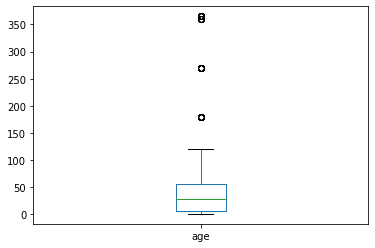

In [11]:
data['age'].plot.box()

In [17]:
data.boxplot(kind='box',subplot=True,layout=(2,5))

ValueError: The 'layout' keyword is not supported when 'by' is None

<AxesSubplot:>

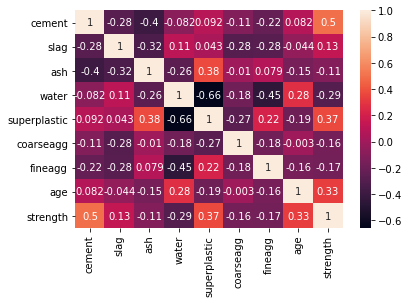

In [18]:
sb.heatmap(data.corr(),annot=True)

<AxesSubplot:>

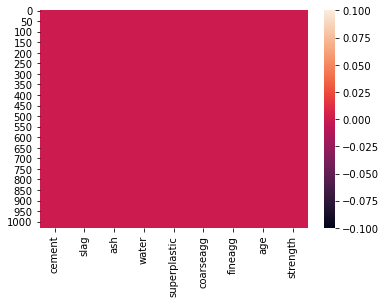

In [19]:
sb.heatmap(data.isnull())

<AxesSubplot:ylabel='Frequency'>

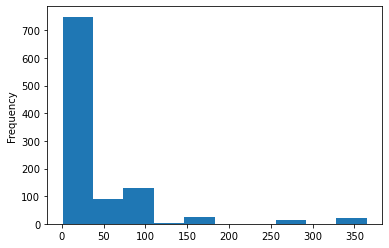

In [20]:
data['age'].plot.hist()

In [21]:
import numpy as np

In [22]:
data['age'] = np.log(data['age'])

<AxesSubplot:ylabel='Frequency'>

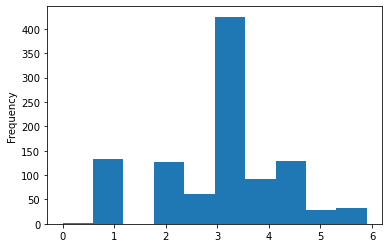

In [23]:
data['age'].plot.hist()

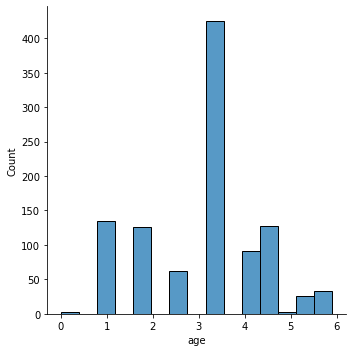

In [27]:
sb.displot(data['age'])

<Figure size 432x288 with 0 Axes>

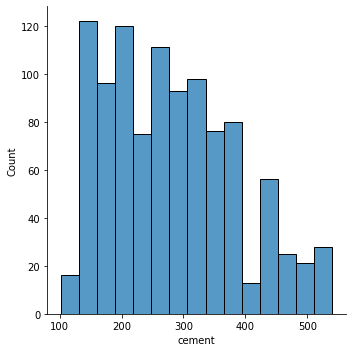

<Figure size 432x288 with 0 Axes>

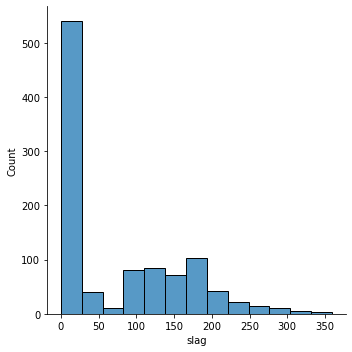

<Figure size 432x288 with 0 Axes>

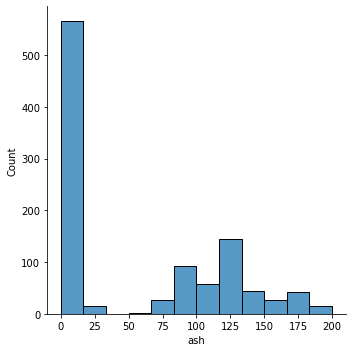

<Figure size 432x288 with 0 Axes>

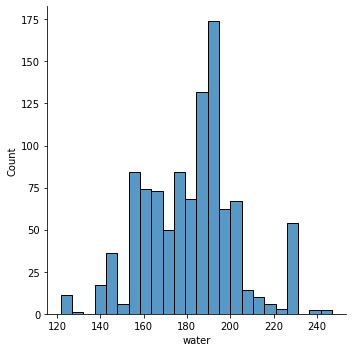

<Figure size 432x288 with 0 Axes>

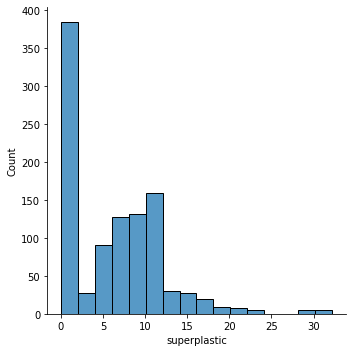

<Figure size 432x288 with 0 Axes>

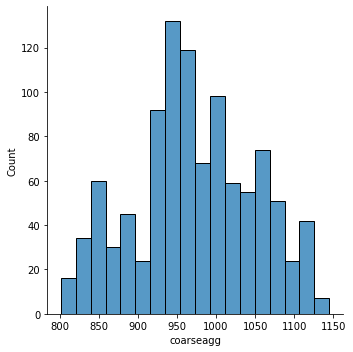

<Figure size 432x288 with 0 Axes>

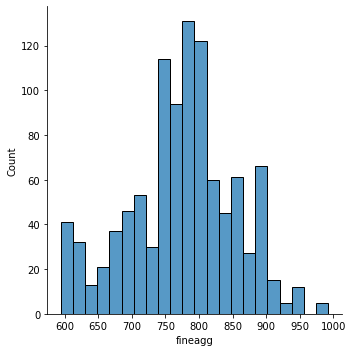

<Figure size 432x288 with 0 Axes>

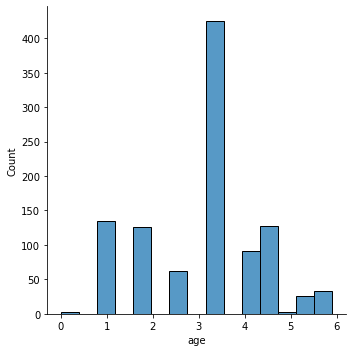

<Figure size 432x288 with 0 Axes>

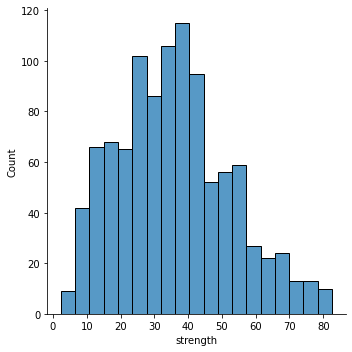

In [28]:
for i in data.columns:
    plt.figure()
    sb.displot(data[i])

In [29]:
y = data.iloc[:,-1]

In [30]:
y.head()

0    29.89
1    23.51
2    29.22
3    45.85
4    18.29
Name: strength, dtype: float64

In [32]:
y.shape

(1030,)

In [33]:
x= data.iloc[:,0:8]

In [34]:
x

cement   slag    ash  water  superplastic  coarseagg  fineagg       age
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5  3.332205
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2  2.639057
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2  3.332205
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0  3.332205
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7  3.332205
...      ...    ...    ...    ...           ...        ...      ...       ...
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0  3.332205
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7  1.098612
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3  3.332205
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  5.598422
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0  1.945910

[1030 rows x 8 columns]

In [35]:
x.shape

(1030, 8)

In [36]:
y.shape

(1030,)

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=44)

In [38]:
x_train.shape

(803, 8)

In [39]:
x_test.shape

(227, 8)

In [40]:
y_train.shape

(803,)

In [41]:
y_test.shape

(227,)

In [42]:
lm = LinearRegression()

In [44]:
lm.fit(x_train,y_train)

LinearRegression()

In [45]:
lm.score(x_train,y_train)

0.8178068743983242

In [46]:
lm.coef_

array([ 0.13652368,  0.11733601,  0.09891113, -0.14358353,  0.04872963,
        0.02920326,  0.03361967,  8.76398332])

In [47]:
lm.intercept_

-73.05294118506919

In [48]:
pred = lm.predict(x_test)

In [49]:
print('Predicted value and actual value',pred,y_test)

Predicted value and actual value [36.56749774 37.70333138 30.51422683 42.43550768 60.16802551 32.71542146
 54.1506097  37.49599714 54.09536912 19.42745154 43.73964321 54.39934259
 13.94553331 42.97729463 28.26611739 26.59109003 57.95288252 32.87523768
 26.97136586 46.96632841 45.68253742 41.09940674  7.42211076 30.4955955
 74.80340394 11.73166455 54.19641008 43.05617385 36.28838859 27.5567979
 13.00822829 25.39399759 40.16138733 31.56366438 46.22239334 32.69333438
 22.84761507 66.24275584 22.94153053 49.71981754 44.98811126 32.49982588
 34.32883138  6.53110846 47.96843398 10.9348679  25.51976687 18.16841716
 10.11749307 39.90980783 39.6387529  23.10281356 35.73685377 31.0363643
 18.27474511 19.31907155 36.28109075 41.06936509 50.47314434 38.56356759
 63.3100876  17.76533021 24.64127057 25.63032647 39.79966819  0.55358143
 47.04805194 47.61565417 16.22752334 45.65618556 32.71029119 25.9195149
 45.33873835 29.5829338  57.9640221  54.56547648 18.38436996 23.32141832
 38.83561519 17.139570

In [50]:
from sklearn.metrics import mean_squared_error,r2_score

In [51]:
print(mean_squared_error(pred,y_test))

55.52747636463652


In [53]:
def predicttest(testvalue):
    testvalue = testvalue.reshape(1,-1)
    t = lm.predict(testvalue)
    print(t)

In [54]:
testv = np.array([540.0,136.158676,120.288793,162.0,2.5,1040,676,28])

In [55]:
predicttest(testv)

[303.89517076]
